# Le prix du vin

Ce problème reprend des données et un  modèle ayant donné lieu à une intense polémique : en mars 1990, Orley Ashenfelter, un professeur d'économie de Princeton publie un article affirmant que l'on peut prédire la qualité du vin, et son prix, sans même le goûter, à partir d'une formule mathématique. Scandale chez les experts de l’œnologie : *“Ashenfelter is an absolute
total sham”* ou *“rather like a movie critic who
never goes to see the movie but
tells you how good it is based on
the actors and the director”*. Dans les faits, la *“Bordeaux-formula”* donne des résultats intéressants qui parfois dépassent les prévisions des experts. L'approche analytique est maintenant lentement adoptée par la communauté. Vous pourrez lire sur data-business.fr un [article](http://www.data-business.fr/statistiques-prediction-qualite-prix-vin-parker-ashenfelter/) à ce sujet. 

**Les données** : ces données proviennent du site de Ashenfelter,  [Liquid Assets](http://www.liquidasset.com/winedata.html).

- la variable dépendante : le prix de vente (une approximation de la qualité du vin) en 1990
- variables indépendantes (prédicteurs)
  - Age (en général les vins les plus anciens sont plus chers)
  - Température moyenne pendant la croissance (*Average Growing Season Temperature* : AGST)
  - Précipitations pendant l'été, *Harvest Rain*
  - Précipitations pendant l'hiver,  *Winter Rain*
  - La population française

**Question 1. ** Lire le fichier `wine.csv`. Utilisiser les fonctions `str` et `summary` pour examiner quelles sont les caractéristiques des variables disponibles. Tracer le logarithme du prix de vente en fonction de AGST d'une part puis de HarvestRain. Qu'en déduisez-vous sur les relations entre ces variables ? 

In [1]:
wine=read.csv("wine.csv")
str(wine)

'data.frame':	25 obs. of  7 variables:
 $ Year       : int  1952 1953 1955 1957 1958 1959 1960 1961 1962 1963 ...
 $ Price      : num  7.5 8.04 7.69 6.98 6.78 ...
 $ WinterRain : int  600 690 502 420 582 485 763 830 697 608 ...
 $ AGST       : num  17.1 16.7 17.1 16.1 16.4 ...
 $ HarvestRain: int  160 80 130 110 187 187 290 38 52 155 ...
 $ Age        : int  31 30 28 26 25 24 23 22 21 20 ...
 $ FrancePop  : num  43184 43495 44218 45152 45654 ...


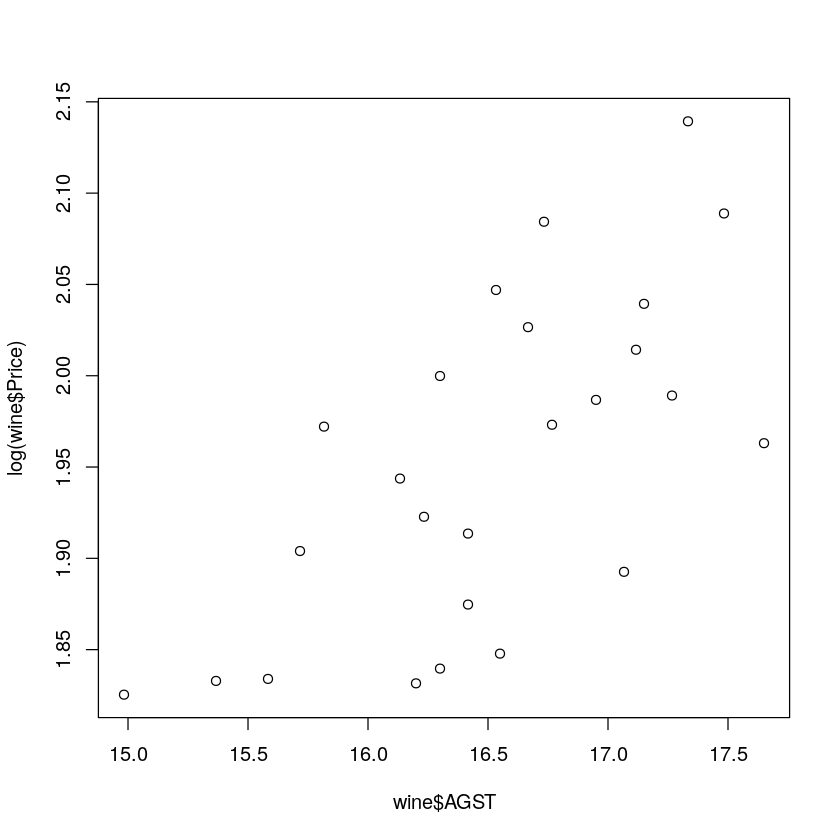

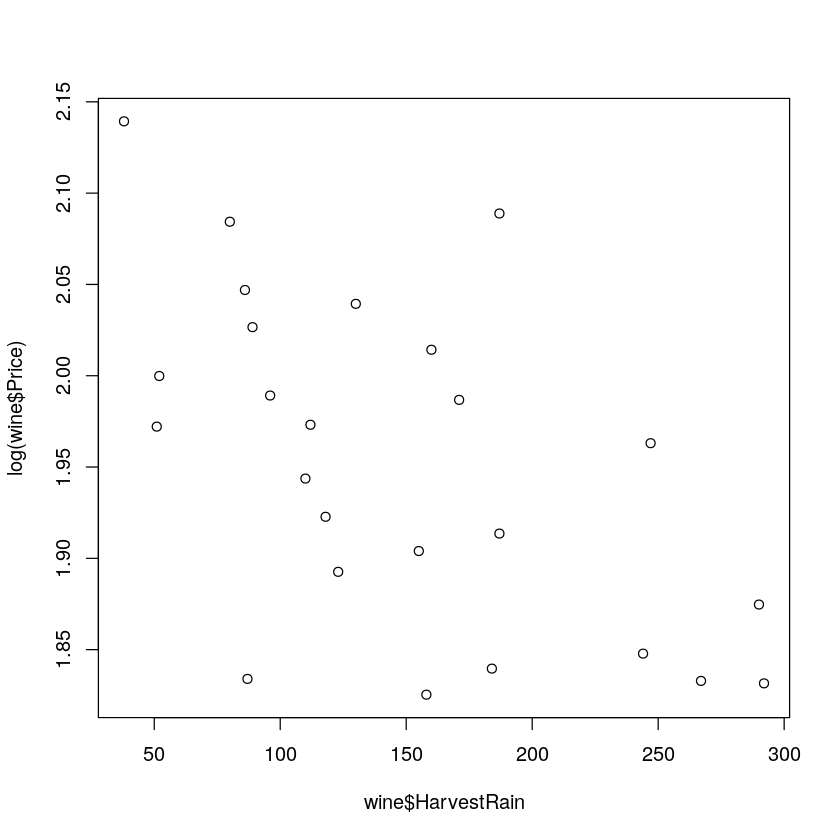

In [2]:
plot(log(wine$Price)~wine$AGST)
plot(log(wine$Price)~wine$HarvestRain)

**Question 2.** Quel est le modèle *baseline* ou par défaut ? Effectuer une première régression `model1` du Prix en fonction de AGST. Utiliser pour cela la fonction `lm`. Calculer le RSS pour ce modèle et comparez le au modèle baseline (il s'agit alors du TSS). Vous pourrez obtenir les résulats pour le modèle *baseline* `model0`, si besoin, en effectuant la régression `Price ~ 1`. Déduisez-en le R2 du modèle, et comparez le à celui qui est fourni par la sortie `summary(model1)`.

In [3]:
model1 = lm(Price ~ AGST, data = wine)
summary(model1)


Call:
lm(formula = Price ~ AGST, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78450 -0.23882 -0.03727  0.38992  0.90318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.4178     2.4935  -1.371 0.183710    
AGST          0.6351     0.1509   4.208 0.000335 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4993 on 23 degrees of freedom
Multiple R-squared:  0.435,	Adjusted R-squared:  0.4105 
F-statistic: 17.71 on 1 and 23 DF,  p-value: 0.000335


Calcul du RSS:

In [4]:
RSS= sum(model1$residuals**2)
RSS

[1] 5.734875

In [5]:
#RSS=sum(model1$residuals**2)
# (RSE*sqrt(n-2))**2
(0.4993*sqrt(23))**2

[1] 5.733911

Modèle *Baseline*

In [5]:
model0 = lm(Price ~ 1, data = wine)
summary(model0)


Call:
lm(formula = Price ~ 1, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86232 -0.54842  0.05388  0.42778  1.42648 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.0672     0.1301   54.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6503 on 24 degrees of freedom


In [26]:
TSS= sum(model0$residuals**2)
TSS

[1] 10.15064

On en déduit le R2:

In [33]:
R2= (TSS-RSS)/TSS
print(paste("R2=",R2))

[1] "R2= 0.43502316779992"


**Question 3.** Ajouter la nouvelle variable indépendante `HarvestRain` pour un nouveau modèle `model2`. Considérez la nouvelle valeur du R2 : le modèle est il amélioré, cette variable est-elle significative ?  Donner à nouveau la valeur du RSS. 

In [5]:
model2 = lm(Price ~ AGST + HarvestRain, data=wine)
summary(model2)


Call:
lm(formula = Price ~ AGST + HarvestRain, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88321 -0.19600  0.06178  0.15379  0.59722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.20265    1.85443  -1.188 0.247585    
AGST         0.60262    0.11128   5.415 1.94e-05 ***
HarvestRain -0.00457    0.00101  -4.525 0.000167 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3674 on 22 degrees of freedom
Multiple R-squared:  0.7074,	Adjusted R-squared:  0.6808 
F-statistic: 26.59 on 2 and 22 DF,  p-value: 1.347e-06


Encore le RSS

In [16]:
RSS= sum(model2$residuals**2)
RSS

[1] 2.970373

**Question 4.** Construire maintenant un modèle avec l'ensemble des variables disponibles.Vous supprimerez la variable  `Year`, qui est redondante avec `Age` par la commande  `wine$Year=NULL`. Examiner quelles sont-les $p$-values des différents prédicteurs. Quelles sont a priori les variables à conserver ? Noter quelle est la valeur du Adjusted-R2. 

In [11]:
wine$Year=NULL

In [14]:
model3=lm(Price ~. , data=wine)
summary(model3)


Call:
lm(formula = Price ~ ., data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48179 -0.24662 -0.00726  0.22012  0.51987 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.504e-01  1.019e+01  -0.044 0.965202    
WinterRain   1.043e-03  5.310e-04   1.963 0.064416 .  
AGST         6.012e-01  1.030e-01   5.836 1.27e-05 ***
HarvestRain -3.958e-03  8.751e-04  -4.523 0.000233 ***
Age          5.847e-04  7.900e-02   0.007 0.994172    
FrancePop   -4.953e-05  1.667e-04  -0.297 0.769578    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3019 on 19 degrees of freedom
Multiple R-squared:  0.8294,	Adjusted R-squared:  0.7845 
F-statistic: 18.47 on 5 and 19 DF,  p-value: 1.044e-06


In [15]:
SSE= sum(model3$residuals**2)
SSE

[1] 1.732113

--> Qestion

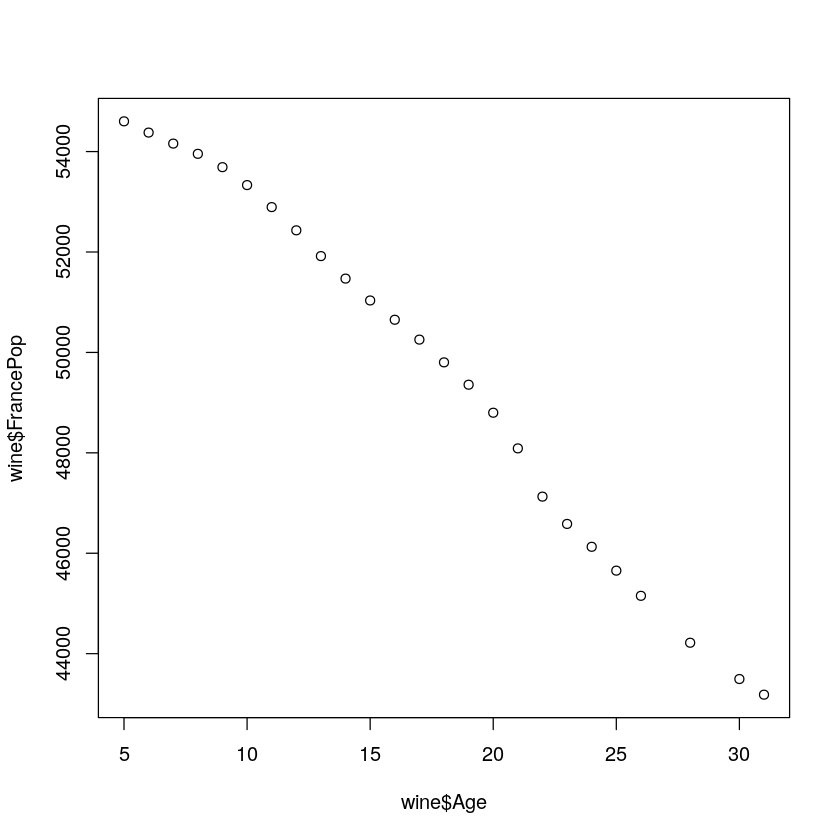

In [33]:
plot(wine$Age, wine$FrancePop)

**Question 5.** Construire un nouveau modèle `model4` en supprimant les variables non sigificatives. Commencez par supprimer uniquement `FrancePop`. Comment évolue le modèle ? 

In [16]:
model4 = lm(Price ~   . - FrancePop , data=wine)
summary(model4)


Call:
lm(formula = Price ~ . - FrancePop, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45470 -0.24273  0.00752  0.19773  0.53637 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.4299802  1.7658975  -1.942 0.066311 .  
WinterRain   0.0010755  0.0005073   2.120 0.046694 *  
AGST         0.6072093  0.0987022   6.152  5.2e-06 ***
HarvestRain -0.0039715  0.0008538  -4.652 0.000154 ***
Age          0.0239308  0.0080969   2.956 0.007819 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.295 on 20 degrees of freedom
Multiple R-squared:  0.8286,	Adjusted R-squared:  0.7943 
F-statistic: 24.17 on 4 and 20 DF,  p-value: 2.036e-07


- On voit qu'il est utile de supprimer cette variable car le adjusted R2 a augmenté
- La variable Age est maintenant significative ! C'est sensé pour le prix du vin... 

En réalité, il y a une corrélation, collinéarité franche entre l'age du vin et la population française. 

**Question 6.** Examiner quels sont les liens entre `Age` et `FrancePop`. Pour cela, tracer les l'un en fonction de l'autre. Une autre manière de procéder peut être de tracer toutes les inter-relations en utilisant la fonction `pairs`. Enfin, calculer et afficher les différentes corrélations, fonction `cor` 

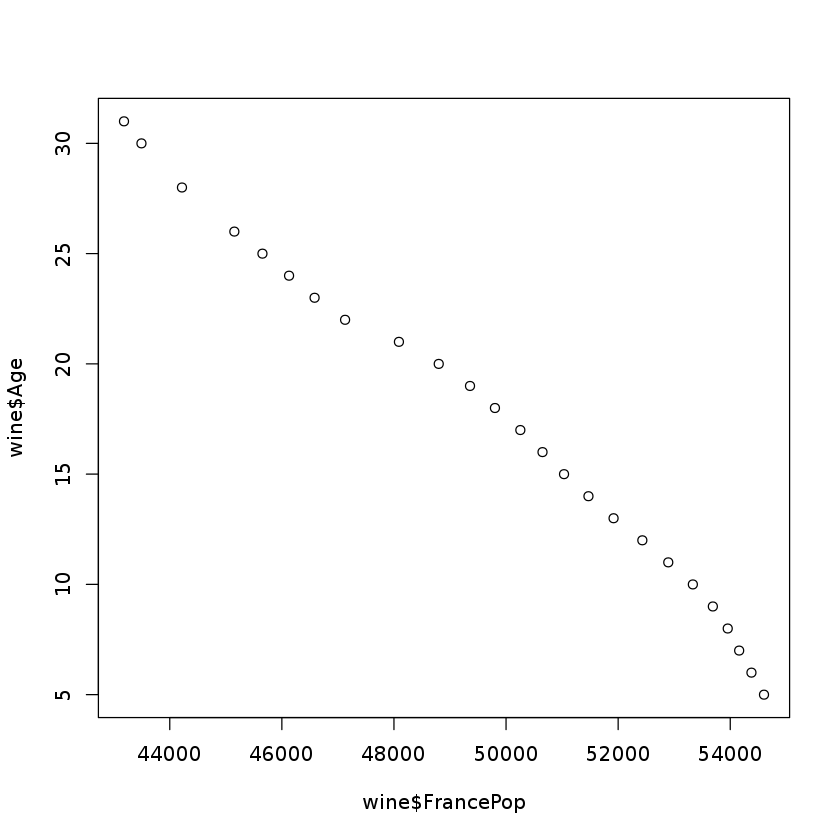

In [47]:
plot(wine$FrancePop, wine$Age)

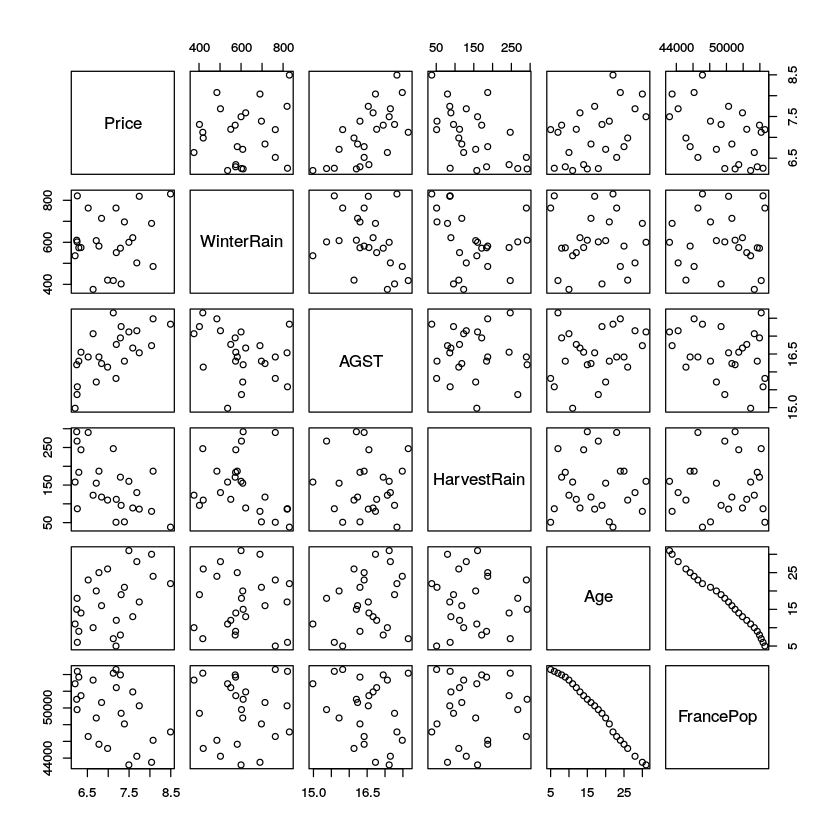

In [50]:
pairs(wine)

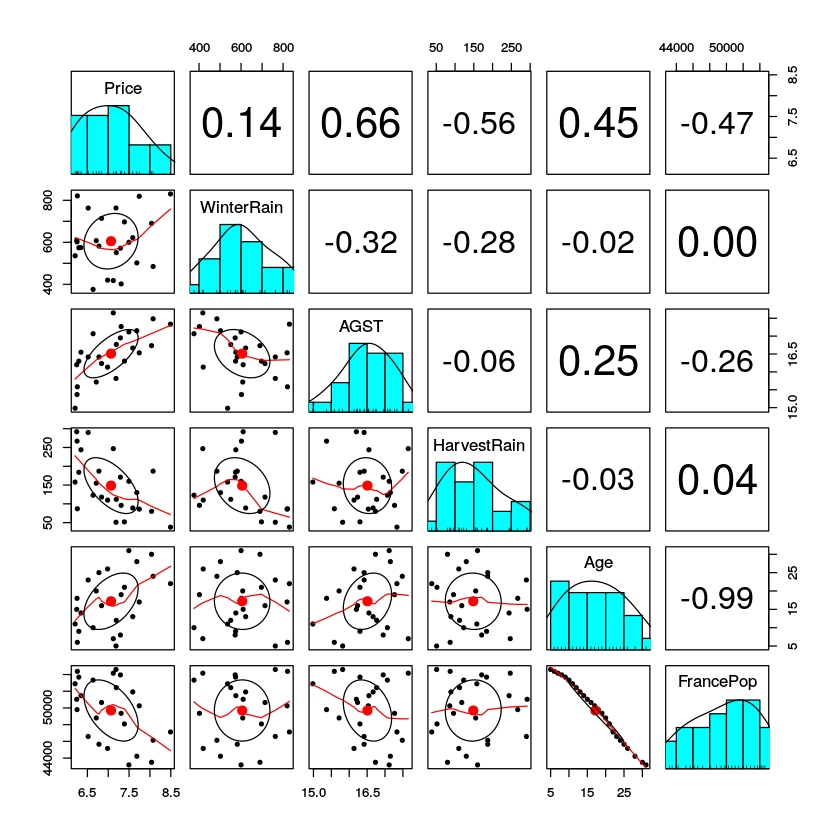

In [64]:
# celui-là est joli aussi
#install.packages("psych")
library(psych)
pairs.panels(wine)

In [ ]:
?cor()

In [9]:
round(cor(wine),2)

,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Price,1.00,0.14,0.66,-0.56,0.45,-0.47
WinterRain,0.14,1.00,-0.32,-0.28,-0.02,0.00
AGST,0.66,-0.32,1.00,-0.06,0.25,-0.26
HarvestRain,-0.56,-0.28,-0.06,1.00,-0.03,0.04
Age,0.45,-0.02,0.25,-0.03,1.00,-0.99
FrancePop,-0.47,0.00,-0.26,0.04,-0.99,1.00


In [49]:
cor(wine$FrancePop, wine$Age)

[1] -0.9944851

**Question 7.** Comme les deux variables `FrancePop` et `Age` étaient annoncées comme non significatives, supprimer ces deux variables du modèle `model5`. Comment évoluent alors les performances ? Faut-il maintenir l'une des variables et dans l'affirmative laquelle ?

In [10]:
model5 = lm(Price ~. -Age  - FrancePop, data=wine)
summary(model5)


Call:
lm(formula = Price ~ . - Age - FrancePop, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67472 -0.12958  0.01973  0.20751  0.63846 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.3016263  2.0366743  -2.112 0.046831 *  
WinterRain   0.0011765  0.0005920   1.987 0.060097 .  
AGST         0.6810242  0.1117011   6.097 4.75e-06 ***
HarvestRain -0.0039481  0.0009987  -3.953 0.000726 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.345 on 21 degrees of freedom
Multiple R-squared:  0.7537,	Adjusted R-squared:  0.7185 
F-statistic: 21.42 on 3 and 21 DF,  p-value: 1.359e-06


On voit qu'à la fois le R-squared et le Ajusted R-squared ont diminué significativement. Ceci indique qu'il faut en inclure au moins une des deux, mais pas les deux (à cause de la collinéarité -- un coefficient de corrélation de 0.99 !). Il est plus raisonnable au niveau interprétabilité, de conserver la variable `Age`. 

**Question 8.**  Il s'agit enfin de prédire le prix de vente pour les années 1979 et 1980. Ces données sont fournies dans le fichier `wine_test.csv`, que vous chargerez. Vous effectuerez la prédiction fonction `predict` et afficherez l'intervalle de confiance par le paramètre interval = 'confidence'. Enfin, comparer ces deux résultats aux valeurs exactes.

In [11]:
wineTest=read.csv("wine_test.csv")
wineTest

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
1,1979,6.9541,717,16.1667,122,4,54835.83
2,1980,6.4979,578,16,74,3,55110.24


In [12]:
predictTest=predict(model4, newdata = wineTest, interval = 'confidence')
predictTest

,fit,lwr,upr
1,6.768925,6.498627,7.039222
2,6.684910,6.373402,6.996419


In [65]:
wineTest$Price

[1] 6.9541 6.4979